### Step 1: Setting Up the Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import re

### Step 2: Creating a Toy Dataset and Word Embeddings

In [2]:
# Toy dataset of sentences
documents = [
    "Machine learning is powerful",
    "Artificial intelligence advances rapidly",
    "Deep learning transforms technology",
    "Data science drives innovation",
    "Neural networks power AI"
]

# Simplified 2D word embeddings (in practice, use pre-trained embeddings)
word_embeddings = {
    "machine": [0.8, 0.2],
    "learning": [0.7, 0.3],
    "powerful": [0.6, 0.4],
    "artificial": [0.9, 0.1],
    "intelligence": [0.85, 0.15],
    "advances": [0.5, 0.5],
    "rapidly": [0.4, 0.6],
    "deep": [0.75, 0.25],
    "transforms": [0.65, 0.35],
    "technology": [0.7, 0.4],
    "data": [0.3, 0.7],
    "science": [0.35, 0.65],
    "drives": [0.4, 0.6],
    "innovation": [0.45, 0.55],
    "neural": [0.8, 0.2],
    "networks": [0.78, 0.22],
    "power": [0.6, 0.4],
    "ai": [0.9, 0.1]
}

### **Step 3: Converting Sentences to Vectors**

In [5]:
def tokenize(text):
    """Convert text to lowercase and split into words."""
    return re.findall(r'\b\w+\b', text.lower())

def sentence_to_vector(sentence,embeddings):
    """Convert a sentence to a vector by averaging word embeddings."""
    words = tokenize(sentence)
    vectors = [embeddings.get(word,[0,0]) for word in words]
    vectors = [v for v in vectors if sum(v) !=0] # remove unknow words
    if not vectors:
        return np.zeros(2)  # Return zero vector if no valid words
    return np.mean(vectors, axis=0)
 
# Convert all documents to vectors
doc_vectors = [sentence_to_vector(doc, word_embeddings) for doc in documents]
    

### Step 4: Implementing Cosine Similarity

In [6]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1,vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot_product / (norm1 * norm2)

### Step 5: Building the Vector Search Function

In [7]:
def vector_search(query, documents, embeddings, top_k=3):
    """Perform vector search and return top-k similar documents."""
    query_vector = sentence_to_vector(query, embeddings)
    similarities = [cosine_similarity(query_vector, doc_vec) for doc_vec in doc_vectors]
    # Get indices of top-k similarities
    ranked_indices = np.argsort(similarities)[::-1][:top_k]
    results = [
        (documents[i], similarities[i])
        for i in ranked_indices
        if similarities[i] > 0
    ]
    return results
 
# Example query
query = "Machine learning technology"
results = vector_search(query, documents, word_embeddings)
print("Query:", query)
print("Top results:")
for doc, score in results:
    print(f"Score: {score:.3f}, Document: {doc}")

Query: Machine learning technology
Top results:
Score: 1.000, Document: Machine learning is powerful
Score: 0.999, Document: Deep learning transforms technology
Score: 0.997, Document: Artificial intelligence advances rapidly


### Step 6: Visualizing the Vectors

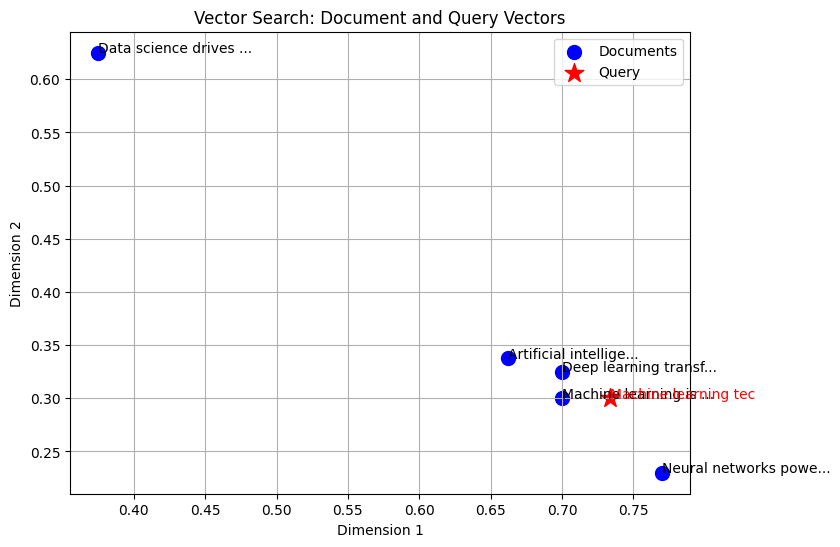

In [8]:
def plot_vectors(doc_vectors, documents, query, query_vector):
    """Plot document and query vectors in 2D space."""
    plt.figure(figsize=(8, 6))
    
    # Plot document vectors
    doc_x, doc_y = zip(*doc_vectors)
    plt.scatter(doc_x, doc_y, c='blue', label='Documents', s=100)
    for i, doc in enumerate(documents):
        plt.annotate(doc[:20] + "...", (doc_x[i], doc_y[i]))
    
    # Plot query vector
    plt.scatter(query_vector[0], query_vector[1], c='red', label='Query', s=200, marker='*')
    plt.annotate(query[:20], (query_vector[0], query_vector[1]), color='red')
    
    plt.title('Vector Search: Document and Query Vectors')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

# Generate the plot
query_vector = sentence_to_vector(query, word_embeddings)
plot_vectors(doc_vectors, documents, query, query_vector)